In [98]:
# Importing required libraries 
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [99]:
# Importing the random OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv(
    Path("./Resources_ML/btc_daily_ohlcv_2016to2021.csv"),
    index_col= "Open Time",
    infer_datetime_format=True,
    parse_dates=True
)

# Displaying sample data
trading_df.head()

,Open,High,Low,Close,Volume
Open Time,,,,,
2018-12-15,3200.00,3312.32,3000.00,3183.47,283.213859
2018-12-16,3183.47,3257.31,3178.54,3199.27,423.048529
2018-12-17,3192.69,3587.35,3187.25,3494.65,1163.940291
2018-12-18,3507.62,3683.35,3428.34,3670.11,1251.139627
2018-12-19,3673.18,3920.00,3618.53,3676.32,2655.242827


In [100]:
trading_df["Actual Returns"]= trading_df["Close"].pct_change()
trading_df.head()

,Open,High,Low,Close,Volume,Actual Returns
Open Time,,,,,,
2018-12-15,3200.00,3312.32,3000.00,3183.47,283.213859,NaN
2018-12-16,3183.47,3257.31,3178.54,3199.27,423.048529,0.004963
2018-12-17,3192.69,3587.35,3187.25,3494.65,1163.940291,0.092327
2018-12-18,3507.62,3683.35,3428.34,3670.11,1251.139627,0.050208
2018-12-19,3673.18,3920.00,3618.53,3676.32,2655.242827,0.001692


In [101]:
# TA for btc minute data
short_window=5
long_window=100

# Generating the short and long window simple moving averages (5 and 100 days, respectively)
trading_df["SMA5"] = trading_df["Close"].rolling(window=short_window).mean()
trading_df["SMA100"] = trading_df["Close"].rolling(window=long_window).mean()

# Reviewing the DataFrame
display(trading_df.head())
display(trading_df.tail())

,Open,High,Low,Close,Volume,Actual Returns,SMA5,SMA100
Open Time,,,,,,,,
2018-12-15,3200.00,3312.32,3000.00,3183.47,283.213859,NaN,NaN,NaN
2018-12-16,3183.47,3257.31,3178.54,3199.27,423.048529,0.004963,NaN,NaN
2018-12-17,3192.69,3587.35,3187.25,3494.65,1163.940291,0.092327,NaN,NaN
2018-12-18,3507.62,3683.35,3428.34,3670.11,1251.139627,0.050208,NaN,NaN
2018-12-19,3673.18,3920.00,3618.53,3676.32,2655.242827,0.001692,3444.764,NaN


,Open,High,Low,Close,Volume,Actual Returns,SMA5,SMA100
Open Time,,,,,,,,
2021-10-06,51502.83,55794.07,50408.96,55330.92,2133.377701,0.074618,50392.034,42331.5163
2021-10-07,55332.46,55352.49,53392.38,53767.81,1434.183730,-0.028250,51611.060,42510.0841
2021-10-08,53788.03,56150.90,53627.77,53918.86,1285.581965,0.002809,52750.832,42699.0030
2021-10-09,53953.98,55500.00,53684.22,54967.95,1105.482930,0.019457,53894.896,42913.5483
2021-10-10,54964.06,56103.79,54096.07,55457.50,932.936320,0.008906,54688.608,43130.0195


In [102]:
trading_df=trading_df.dropna()
trading_df.head()

,Open,High,Low,Close,Volume,Actual Returns,SMA5,SMA100
Open Time,,,,,,,,
2019-03-24,3978.75,3981.84,3935.35,3973.06,324.479257,-0.001485,3986.558,3727.2643
2019-03-25,3970.64,3981.20,3861.25,3908.26,901.275698,-0.016310,3962.020,3734.5122
2019-03-26,3909.32,3923.55,3878.11,3922.54,764.297603,0.003654,3952.448,3741.7449
2019-03-27,3923.33,4033.97,3909.34,4026.00,818.695441,0.026376,3961.766,3747.0584
2019-03-28,4026.69,4031.25,3993.48,4008.23,598.334825,-0.004414,3967.618,3750.4396


In [103]:
# Initializing new Signal column
trading_df['Signal'] = 0.0

# Creating the signal to buy
trading_df.loc[(trading_df['Actual Returns'] >= 0), 'Signal'] = 1

# Creating the signal to sell
trading_df.loc[(trading_df['Actual Returns'] < 0), 'Signal'] = -1
# Previewing dataframe
trading_df = trading_df.dropna()
trading_df.head()

,Open,High,Low,Close,Volume,Actual Returns,SMA5,SMA100,Signal
Open Time,,,,,,,,,
2019-03-24,3978.75,3981.84,3935.35,3973.06,324.479257,-0.001485,3986.558,3727.2643,-1.0
2019-03-25,3970.64,3981.20,3861.25,3908.26,901.275698,-0.016310,3962.020,3734.5122,-1.0
2019-03-26,3909.32,3923.55,3878.11,3922.54,764.297603,0.003654,3952.448,3741.7449,1.0
2019-03-27,3923.33,4033.97,3909.34,4026.00,818.695441,0.026376,3961.766,3747.0584,1.0
2019-03-28,4026.69,4031.25,3993.48,4008.23,598.334825,-0.004414,3967.618,3750.4396,-1.0


In [104]:
# Assigning a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
X = trading_df[['SMA5', 'SMA100']].shift().dropna().copy()

# Displaying sample data
X.head()

,SMA5,SMA100
Open Time,,
2019-03-25,3986.558,3727.2643
2019-03-26,3962.020,3734.5122
2019-03-27,3952.448,3741.7449
2019-03-28,3961.766,3747.0584
2019-03-29,3967.618,3750.4396


In [105]:
# Copying the new "signal" column to a new Series called `y`.
y = trading_df['Signal'].copy()
y[:10]

Open Time
2019-03-24   -1.0
2019-03-25   -1.0
2019-03-26    1.0
2019-03-27    1.0
2019-03-28   -1.0
2019-03-29    1.0
2019-03-30    1.0
2019-03-31   -1.0
2019-04-01    1.0
2019-04-02    1.0
Name: Signal, dtype: float64

In [106]:
#Counting the y classes
y.value_counts()

 1.0    501
-1.0    431
Name: Signal, dtype: int64

In [107]:
# Spliting the data into train and test 
# Selecting the start of the training period
training_begin = X.index.min()

# Displaying the training begin date
print(training_begin)


2019-03-25 00:00:00


In [108]:
# Selecting the ending period for the training data with an offset of 2 months
training_end = X.index.min() + DateOffset(months=2)

# Displaying the training end date
print(training_end)

2019-05-25 00:00:00


In [109]:
# Generating the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Displaying sample data
X_train.head()

,SMA5,SMA100
Open Time,,
2019-03-25,3986.558,3727.2643
2019-03-26,3962.020,3734.5122
2019-03-27,3952.448,3741.7449
2019-03-28,3961.766,3747.0584
2019-03-29,3967.618,3750.4396


In [110]:
# Generating the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Displaying sample data
X_test.head()

,SMA5,SMA100
Open Time,,
2019-05-25,7891.456,4986.8128
2019-05-26,7904.972,5031.9809
2019-05-27,8061.630,5083.6749
2019-05-28,8293.808,5135.7292
2019-05-29,8464.182,5186.7437


In [111]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Applying the scaler model to fit the X_train data
X_scaler = scaler.fit(X_train)

# Transforming the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [112]:
#Logistic Regression model 
# Creating the classifier model
lr_model = LogisticRegression()

# Fitting the model to the data using X_train_scaled and y_train
lr_model = lr_model.fit(X_train_scaled, y_train)

# Using the trained model to predict the trading signals for the training data
training_signal_predictions = lr_model.predict(X_train_scaled)

# Displaying the sample predictions
training_signal_predictions[:20]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [113]:
# Evaluating the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       1.00      0.13      0.23        23
         1.0       0.66      1.00      0.80        39

    accuracy                           0.68        62
   macro avg       0.83      0.57      0.51        62
weighted avg       0.79      0.68      0.59        62



In [114]:
testing_signal_predictions= lr_model.predict(X_test_scaled)
testing_signal_predictions[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [115]:
# Evaluating the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)
print(testing_report)

              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.01       407
         1.0       0.53      1.00      0.70       463

    accuracy                           0.53       870
   macro avg       0.77      0.50      0.35       870
weighted avg       0.75      0.53      0.37       870



In [116]:
# Creating a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = trading_df["Actual Returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Reviewing the DataFrame
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Open Time,,,
2019-05-25,1.0,0.009102,0.009102
2019-05-26,1.0,0.081825,0.081825
2019-05-27,1.0,0.005992,0.005992
2019-05-28,1.0,-0.006313,-0.006313
2019-05-29,1.0,-0.007649,-0.007649


In [117]:
# Calculating and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
cumulative_return=(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod()
cumulative_return.tail()

,actual_returns,trading_algorithm_returns
Open Time,,
2021-10-06,6.916564,8.856018
2021-10-07,6.721169,8.605834
2021-10-08,6.740051,8.630010
2021-10-09,6.871191,8.797923
2021-10-10,6.932387,8.876278


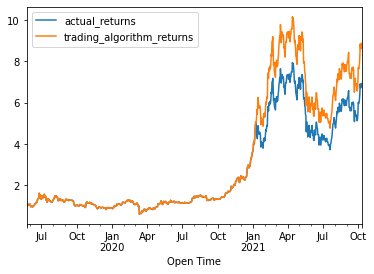

In [118]:
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

Different Machine Learning Model - SVM

In [119]:
# Importing the SVM model
from sklearn import svm

In [120]:
# Creating the classifier model
svm_model = svm.SVC()

# Fitting the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Using the trained model to predict the trading signals for the training data
svm_training_signal_predictions = svm_model.predict(X_train_scaled)

# Displaying the sample predictions
svm_training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [121]:
# Evaluating the model using a classification report
svm_training_report = classification_report(y_train, svm_training_signal_predictions)
print(svm_training_report)

              precision    recall  f1-score   support

        -1.0       1.00      0.09      0.16        23
         1.0       0.65      1.00      0.79        39

    accuracy                           0.66        62
   macro avg       0.82      0.54      0.47        62
weighted avg       0.78      0.66      0.55        62



In [122]:
# Using the trained model to predict the trading signals for the testing data.
svm_testing_signal_predictions = svm_model.predict(X_test_scaled)

In [123]:
# Evaluating the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, svm_testing_signal_predictions)
print(testing_report)

              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.01       407
         1.0       0.53      1.00      0.70       463

    accuracy                           0.53       870
   macro avg       0.77      0.50      0.35       870
weighted avg       0.75      0.53      0.37       870



/Users/ksenia/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ksenia/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ksenia/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [124]:
# Creating a predictions DataFrame
svm_predictions_df = pd.DataFrame(index=X_test.index)

svm_predictions_df["predicted_signal"] = testing_signal_predictions

svm_predictions_df["actual_returns"] = trading_df["Actual Returns"]

svm_predictions_df["svm_trading_algorithm_returns"] = (
    svm_predictions_df["actual_returns"] * svm_predictions_df["predicted_signal"]
)

# Reviewing the DataFrame
svm_predictions_df.head()

,predicted_signal,actual_returns,svm_trading_algorithm_returns
Open Time,,,
2019-05-25,1.0,0.009102,0.009102
2019-05-26,1.0,0.081825,0.081825
2019-05-27,1.0,0.005992,0.005992
2019-05-28,1.0,-0.006313,-0.006313
2019-05-29,1.0,-0.007649,-0.007649


In [125]:
# Calculating and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
cumulative_return=(1 + svm_predictions_df[["actual_returns", "svm_trading_algorithm_returns"]]).cumprod()
cumulative_return.tail()

,actual_returns,svm_trading_algorithm_returns
Open Time,,
2021-10-06,6.916564,8.856018
2021-10-07,6.721169,8.605834
2021-10-08,6.740051,8.630010
2021-10-09,6.871191,8.797923
2021-10-10,6.932387,8.876278


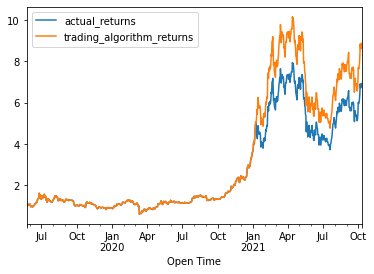

In [126]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()